In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import welly
import lasio
import tkinter
import Stdlog

## <kbd> <b> Loading and Visualization of Log Data </b> </kbd>

In [2]:
well5 = Stdlog.stdlog(r'tutorial/WellX-5.las')

In [3]:
mnemonics= {
    'GR': 'GR',
    'CALI': 'CALI',
    'DEPTH': 'DEPTH',
    'TVD': 'TVD',
    'LL9S': 'LL9S',
    'LL9D': 'LL9D',
    'MSFL': 'MSFL',
    'RT': 'RT',
    'RX0': 'RX0',
    'CNL': 'CNL',
    'DENS': 'DENS',
    'SONI': 'SONI'
}

tracks = [['GR'], ['DEPTH','TVD'],['LL9D', 'LL9S'], ['DENS', 'CNL']]
tr = [['GR', 'CALI'], ['TVD'],['DENS', 'CNL']]

shalebaseline = 70

/home/mirzakhan/Desktop/FDP/Stdlog/Stdlog.py:216: RuntimeWarning: invalid value encountered in less
  ax.fill_betweenx(y, val, x2, where = val > x2, interpolate = True, color = '#d6cc0b')
/home/mirzakhan/Desktop/FDP/Stdlog/Stdlog.py:217: RuntimeWarning: invalid value encountered in greater
  ax.fill_betweenx(y, val, x2, where = val < x2, interpolate = True, color = '#b55a2a')


<module 'matplotlib.pyplot' from '/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/matplotlib/pyplot.py'>

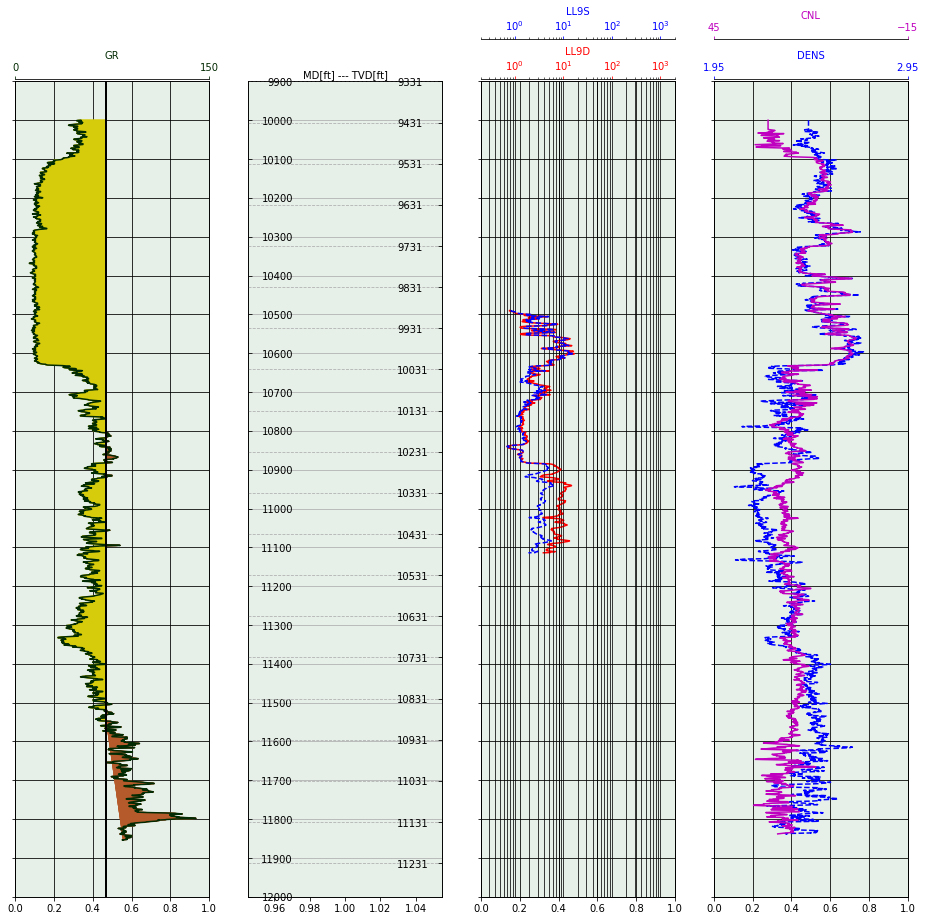

In [4]:
well5.visualize(mnemonics, pltrange = (9900, 12000), tracks = tracks, sbsline = (shalebaseline, 'shaded'))

In [5]:
well_5 = well5.wellobject
well_5 = well_5.df()

well_5['DEPTH'] = well_5.index*3.28084

## <kbd> <b>Lithology Investigation Using M N plot</b></kbd>

In [6]:
def calculate_MN (rhob, t, PhiN, rhof = 1, tf = 189,PhiN_f = 1):
    """
    A function that calculates the M N value for given petrophysical data
    
    Params:
        rhob (float): Bulk Density (g/cc)
        t    (float): Acoustic impedance time (us/ft)
        PhiN (float): Neutron Porosity in Limestone units
        rhof (float): Drilling fluid Density   (in  fresh mud systems this value is 1 gr/cc)
        tf   (float): Drilling fluid impedance (in fresh mud systems this value is 189 us/ft)
        PhiN_f      : In fresh mud systems this value is 1
    """
    
    M = 0.01 * (tf - t)/(rhob - rhof)
    N = (PhiN_f - PhiN)/(rhob - rhof)
    
    MN = { 
         "M": M,
         "N": N
        }
    
    return MN 

In [13]:
rhob = np.array(well_5.loc[(well_5['DEPTH']> 10000) & (well_5['DEPTH']< 11200)]['DENS'])
t    = np.array(well_5.loc[(well_5['DEPTH']> 10000) & (well_5['DEPTH']< 11200)]['SONI'])
PhiN = np.array(well_5.loc[(well_5['DEPTH']> 10000) & (well_5['DEPTH']< 11200)]['CNL'])/100

In [14]:
out = calculate_MN(rhob, t, PhiN)
out['TVD'] = np.array(well_5.loc[(well_5['DEPTH']> 10000) & (well_5['DEPTH'] <11200)]['TVD'])

MN = pd.DataFrame(out)

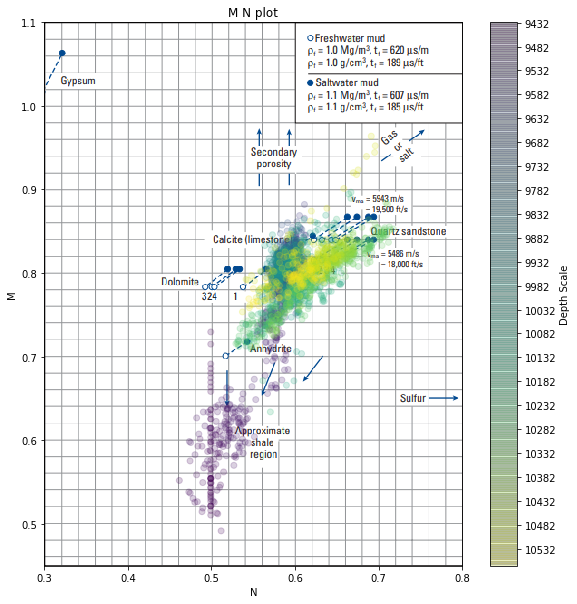

In [15]:
import matplotlib.image as mpimg
import matplotlib as mpl

fig = plt.figure(figsize = (10,10))
crossplot = mpimg.imread(r'meta/MNplot.png')
ax = fig.add_subplot(1,1,1)

c = np.array(MN['TVD'])
ax.set_xlabel('N')
ax.set_ylabel('M')
ax.set_title("M N plot")

ax.imshow(crossplot, extent = [0.3,0.8, 0.45, 1.1])
plt.scatter(MN['N'], MN['M'], alpha = 0.2, c = c, cmap = 'viridis')

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cbar = plt.colorbar(norm = norm, spacing = ['propotional'], ticks = np.arange(9432, 10565,50), drawedges = True)
cbar.set_label('Depth Scale')
cbar.ax.invert_yaxis()

## <kbd> <b>Determination of Porosity fron Density, Neutron, and Sonic Logs</b></kbd>

In [9]:
#Porosity using Density log values
def rhob2por(values, rho_ma, rhof):
    return (rho_ma - values)/(rho_ma - rhof)

#Porosity using Sonic log values
def sonic2por(values, tma, tf):
    return (values - tma)/(tf - tma)


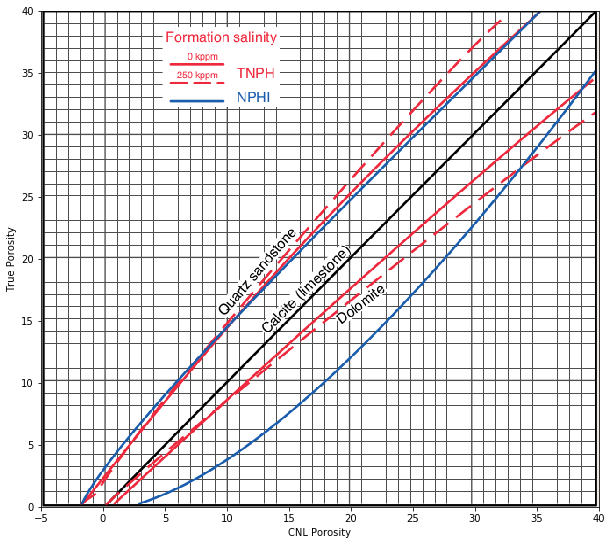

In [12]:
%matplotlib inline
import matplotlib.image as mpimg

fig = plt.figure(figsize = (10,10))
crossplot = mpimg.imread(r'meta/porosity.png')
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('True Porosity')
ax.set_xlabel('CNL Porosity')
ax.imshow(crossplot, extent = [-5,40, 0, 40])

In [10]:
def cnl2por (value):
    #constants for sandstone
    A = 3
    B = 1.1378047138908756
    C = -0.003149046018584751
    
    return A + B*value + C*value**2

In [11]:
CNL = np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['CNL'])
DENS = np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['DENS'])
SONI = np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['SONI'])
DEPTH = np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['DEPTH'])
TVD = np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['TVD'])

In [12]:
rhob_porosity = rhob2por(DENS, 2.65, 0.84)

(array([ 11.,  20.,  12.,  75.,  87., 145., 187.,  78.,  10.,   7.]),
 array([0.12596685, 0.14618785, 0.16640884, 0.18662983, 0.20685083,
        0.22707182, 0.24729282, 0.26751381, 0.28773481, 0.3079558 ,
        0.3281768 ]),
 <a list of 10 Patch objects>)

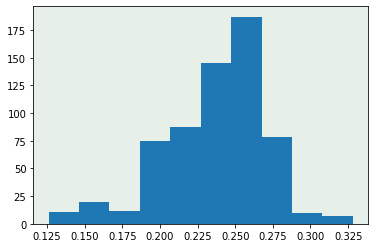

In [13]:
plt.hist(rhob_porosity)

In [17]:
sonic_porosity = sonic2por(SONI, 86, 189)

In [14]:
cnl_porosity = cnl2por(CNL)

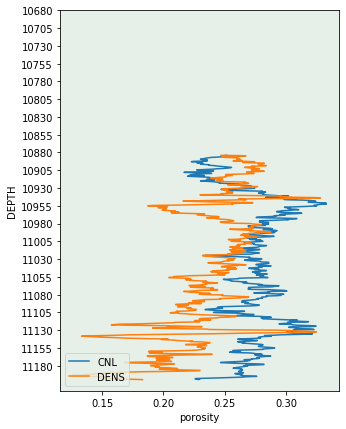

In [15]:
fig = plt.figure(figsize=(5,7))
plt.plot(cnl_porosity/100, DEPTH)
plt.plot(rhob_porosity, DEPTH)
plt.xlabel('porosity')
plt.ylabel('DEPTH')
plt.legend(['CNL', 'DENS'], loc = 'lower left')
plt.yticks(np.arange(10680, 11200, 25))
plt.gca().invert_yaxis()

<h3><b>Remarks:</b></h3>
    <p style = "font-size:1em;"> <b>As can be seen Porosity values derived from CNL log and Density logs highly matches.
    This shows any of those 2 porosity indicators can be used in further evaluations.
    Since bulk density derived values are more concrete and well referenced, the author selects
    <kbd>bulk density derived porosity for further analysis of the well</kbd
    </b> </p>

## <kbd> <b>Determination of Saturation</b></kbd>

In [17]:
d = {
    'Rt': np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['RT']),
    'DEPTH': DEPTH,
    'density_porosity': rhob_porosity,
    'TVD': TVD,
    'GR': np.array(well_5.loc[(well_5['DEPTH']> 10884) & (well_5['DEPTH']< 11200)]['GR'])
}


df = pd.DataFrame(d)

In [18]:
def calculate_Sw(data, a, m, Rw, n):
    phi = np.array(data['density_porosity'])
    Rt  = np.array(data['Rt'])
    F = a/(phi**m)
    
    return np.sqrt((F * Rw)/Rt)

In [19]:
Sw = calculate_Sw(df, 0.81, 2, 0.066, 2)

In [20]:
df['Sw']  = Sw

In [21]:
np.mean(Sw[np.logical_not(np.isnan(Sw))])

0.2776348559649189

(array([ 23.,  66., 117.,  75.,  67.,  52.,  24.,  21.,  15.,   1.]),
 array([0.16872083, 0.19800984, 0.22729885, 0.25658786, 0.28587687,
        0.31516588, 0.34445489, 0.3737439 , 0.40303291, 0.43232192,
        0.46161093]),
 <a list of 10 Patch objects>)

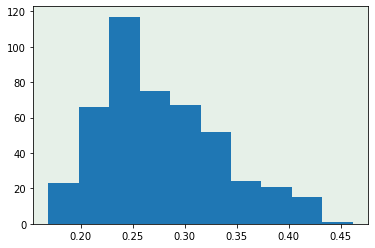

In [22]:
plt.hist(Sw[np.logical_not(np.isnan(Sw))])

In [23]:
df.to_csv("Out/Well5-PorSw.csv")